In [1]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [2]:
col=['letter',
     'x-box',
     'y-box',
     'width',
     'height',
     'onpix',
     'x-bar',
     'y-bar',
     'x2bar',
     'y2bar',
     'xybar',
     'x2ybr',
     'xy2br',
     'x-ege',
     'xegvy',
     'y-ege',
     'yegvx']
letter=pd.read_csv("letter.data",names=col)

In [3]:
letter.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
print("Total Data {0}".format(letter.letter.count()))
print("Total Kelas {0}".format((letter.letter.unique()).size))
max = 0
for types in letter.letter.unique():
    count = letter[letter.letter==types].letter.count()
    print("Kelas {0} : {1}".format(types, count))
    if(count>max):
        max = count
print("Maximum Data : {0}".format(max)) #813 (~814%2 == 0; 814/2 407 train, 407 test)

Total Data 20000
Total Kelas 26
Kelas T : 796
Kelas I : 755
Kelas D : 805
Kelas N : 783
Kelas G : 773
Kelas S : 748
Kelas B : 766
Kelas A : 789
Kelas J : 747
Kelas M : 792
Kelas X : 787
Kelas O : 753
Kelas R : 758
Kelas F : 775
Kelas C : 736
Kelas H : 734
Kelas W : 752
Kelas L : 761
Kelas P : 803
Kelas E : 768
Kelas V : 764
Kelas Y : 786
Kelas Q : 783
Kelas U : 813
Kelas K : 739
Kelas Z : 734
Maximum Data : 813


In [5]:
lbdata = letter[0:0] #letter balanced data
for types in letter.letter.unique():
    count = letter[letter.letter==types].letter.count()
    lbdata = pd.concat([lbdata,(letter[letter.letter==types])])
    lbdata = pd.concat([lbdata,(letter[letter.letter==types][:max-count+1])])
    
for types in lbdata.letter.unique():
    print("Kelas {0} : {1}".format(types, lbdata[lbdata.letter==types].letter.count()))

lbdata.head()

Kelas T : 814
Kelas I : 814
Kelas D : 814
Kelas N : 814
Kelas G : 814
Kelas S : 814
Kelas B : 814
Kelas A : 814
Kelas J : 814
Kelas M : 814
Kelas X : 814
Kelas O : 814
Kelas R : 814
Kelas F : 814
Kelas C : 814
Kelas H : 814
Kelas W : 814
Kelas L : 814
Kelas P : 814
Kelas E : 814
Kelas V : 814
Kelas Y : 814
Kelas Q : 814
Kelas U : 814
Kelas K : 814
Kelas Z : 814


,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
18,T,6,11,6,8,5,6,11,5,6,11,9,4,3,12,2,4
103,T,2,3,2,2,1,7,11,2,6,7,10,8,1,11,1,7
106,T,5,8,5,6,3,6,12,4,7,12,9,4,2,12,2,4
141,T,2,1,2,1,0,8,15,1,4,6,10,8,0,8,0,8


In [6]:
print(lbdata)

     letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0         T      2      8      3       5      1      8     13      0      6   
18        T      6     11      6       8      5      6     11      5      6   
103       T      2      3      2       2      1      7     11      2      6   
106       T      5      8      5       6      3      6     12      4      7   
141       T      2      1      2       1      0      8     15      1      4   
...     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
2426      Z      8      8      6      11      5      7      7      4      3   
2527      Z      7      9      7       5      4      7      7      2      9   
2532      Z      2      1      2       2      1      7      7      3     11   
2588      Z      3      8      4       6      2      7      7      3     13   
2623      Z      4      8      5       6      2      7      7      4     14   

      xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yeg

In [7]:
train = lbdata[0:0]
test = lbdata[0:0]
tr_out, te_out = train_test_split(lbdata, test_size=0.5)
for types in lbdata.letter.unique():
    tr_out, te_out = train_test_split(lbdata[lbdata.letter == types], test_size=0.5)
    train = pd.concat([train, tr_out])
    test = pd.concat([test, te_out])

In [8]:
print("Training size : {0}".format(train['letter'].count()))
print("Test size : {0}".format(test['letter'].count()))
for types in lbdata.letter.unique():
    print("Kelas {0} : TR={1}|TE={2} ".format(types,train[train.letter==types].letter.count(),test[test.letter==types].letter.count()))

Training size : 10582
Test size : 10582
Kelas T : TR=407|TE=407 
Kelas I : TR=407|TE=407 
Kelas D : TR=407|TE=407 
Kelas N : TR=407|TE=407 
Kelas G : TR=407|TE=407 
Kelas S : TR=407|TE=407 
Kelas B : TR=407|TE=407 
Kelas A : TR=407|TE=407 
Kelas J : TR=407|TE=407 
Kelas M : TR=407|TE=407 
Kelas X : TR=407|TE=407 
Kelas O : TR=407|TE=407 
Kelas R : TR=407|TE=407 
Kelas F : TR=407|TE=407 
Kelas C : TR=407|TE=407 
Kelas H : TR=407|TE=407 
Kelas W : TR=407|TE=407 
Kelas L : TR=407|TE=407 
Kelas P : TR=407|TE=407 
Kelas E : TR=407|TE=407 
Kelas V : TR=407|TE=407 
Kelas Y : TR=407|TE=407 
Kelas Q : TR=407|TE=407 
Kelas U : TR=407|TE=407 
Kelas K : TR=407|TE=407 
Kelas Z : TR=407|TE=407 


In [9]:
#train.to_csv(r'export\train.csv', index=False)
#test.to_csv(r'export\test.csv', index=False)
train=pd.read_csv(r'export\train.csv')
test=pd.read_csv(r'export\test.csv')

In [10]:
print(train.head())
print(test.head())

  letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0      T      4      8      5       6      3      7     12      3      7   
1      T      3      6      4       4      3      6     12      4      6   
2      T      1      0      2       0      0      7     15      2      4   
3      T      5      7      7       6      6      5      8      3      8   
4      T      2      7      3       4      1      5     14      1      6   

   xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0      7     11      8      2     12      1      7  
1      8     11      8      2     12      1      8  
2      7     10      8      0      8      0      8  
3      7      7      9      3      7      7      5  
4      9     11      7      0      8      0      8  
  letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0      T      2      7      4       5      2      7     13      0      5   
1      T      3      3      4       2      1      5     11      3      7 

Histogram Train masing-masing fitur data


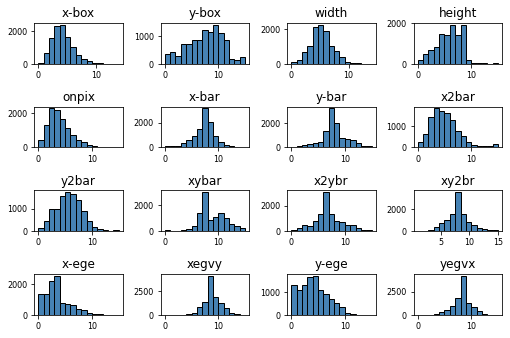

In [11]:
%matplotlib inline
print("Histogram Train masing-masing fitur data")
train.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

Histogram Test masing-masing fitur data


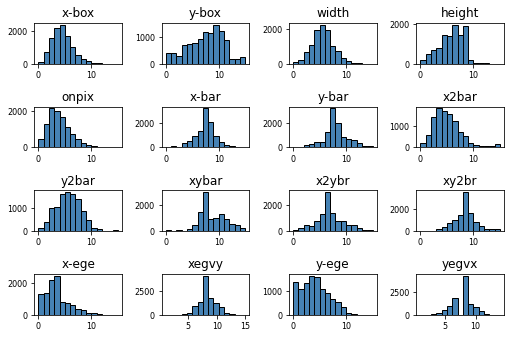

In [12]:
%matplotlib inline
print("Histogram Test masing-masing fitur data")
test.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

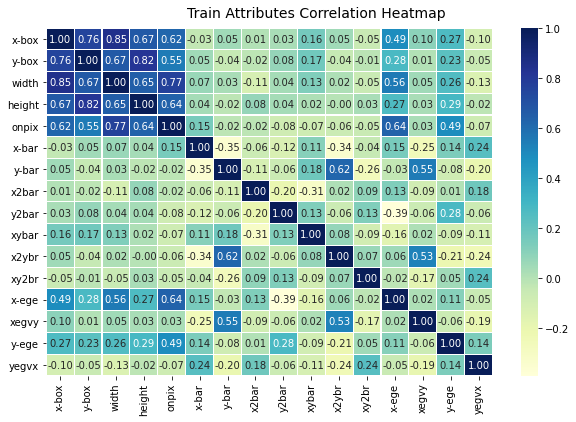

In [13]:
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 6))
corr = train.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="YlGnBu",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Train Attributes Correlation Heatmap', fontsize=14)

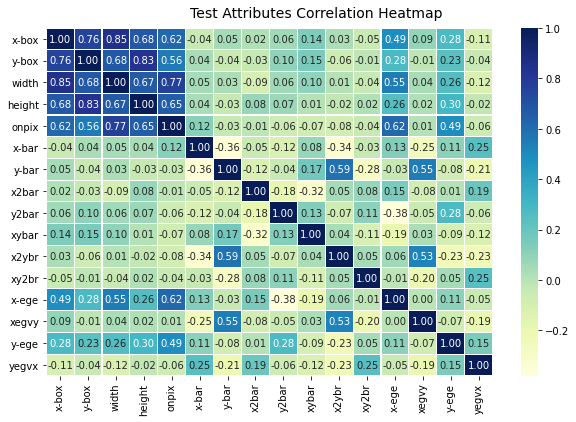

In [14]:
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 6))
corr = test.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="YlGnBu",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Test Attributes Correlation Heatmap', fontsize=14)

In [15]:
train.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,4.022775,7.020223,5.114723,5.372519,3.498771,6.864392,7.495086,4.629087,5.209507,8.284918,6.417879,7.962861,3.023531,8.342657,3.717728,7.804385
std,1.912990,3.292956,2.021450,2.258160,2.184468,2.067576,2.333446,2.693406,2.398305,2.499711,2.610350,2.087093,2.334821,1.532668,2.564098,1.631519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,14.000000,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [16]:
test.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,4.018806,7.049991,5.119070,5.370440,3.501512,6.928085,7.488660,4.617086,5.174636,8.288225,6.466074,7.940559,3.041391,8.325458,3.690607,7.813646
std,1.918706,3.322569,2.015252,2.268147,2.194698,1.997548,2.305759,2.698441,2.380680,2.488171,2.636059,2.068152,2.329568,1.546407,2.586433,1.595065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000


In [90]:
%matplotlib notebook
colors = {
  'A':'maroon',#A
  'B':'springgreen',#B
  'C':'salmon',#C
  'D':'hotpink',#D
  'E':'blue',#E
  'F':'y',#F
  'G':'lawngreen',#G
  'H':'navy',#H
  'I':'red',#I
  'J':'aquamarine',#J
  'K':'lightseagreen',#K
  'L':'c',#L
  'M':'purple',#M
  'N':'deepskyblue',#N
  'O':'dodgerblue',#O
  'P':'g',#P
  'Q':'gold',#Q
  'R':'mediumpurple',#R
  'S':'darkorchid',#S
  'T':'aqua',#T
  'U':'magenta',#U
  'V':'crimson',#V
  'W':'pink',#W
  'X':'black',#X
  'Y':'grey',#Y
  'Z':'lightgray',#Z
    }
def generateColorLetter(data):
    counter = 0
    data = data.sort_values(by=['letter'], ascending=True)
    data['color'] = ''
    data['letterID'] = ''
    for letter in data.letter.unique():
        data.letterID[data.letter == letter]  = counter
        data.color[data.letter == letter] = colors[letter]
        counter += 1
    return data

In [91]:
print(train.tail())
print(test.head())

      letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
10577      Z      6     10      8       7      5      6      9      3     10   
10578      Z      5     10      7       8      5      7      8      2      9   
10579      Z      8     14      8       8      5      8      5      2      9   
10580      Z      4      8      6       6      6      8      8      3      8   
10581      Z      3     10      4       7      3      7      8      3     11   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
10577     12      9      7      1      9      6      6  
10578     12      7      8      1      9      6      7  
10579     12      6      9      3      7      6      7  
10580      7      7      7      1      8      9      8  
10581      9      6      8      0      8      7      8  
  letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0      T      2      7      4       5      2      7     13      0      5   
1      T      3      3   

In [92]:
def scatter(data, name, x, y,colors):
    data = generateColorLetter(data)
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    xmax = 0
    ymax = 0
    counter = 0
    for letter in data.letter.unique():
        counts = data[data.letter == letter].groupby(['color',x, y]).size().reset_index(name='counts')
        plt.scatter(counts[x], counts[y], s = counts.counts*50, label=letter, facecolor='none',
                    edgecolor=counts['color'])
        xmax = counts[x].max() if xmax<counts[x].max() else xmax
        ymax = counts[y].max() if ymax<counts[y].max() else ymax
        counter += 1
    plt.xlim([-1,xmax + 1])
    plt.ylim([-1,ymax + 1])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.title("{0} vs {1} Scatter Map of {0} Dataset".format(x,y,name))
    plt.show()

<IPython.core.display.Javascript object>


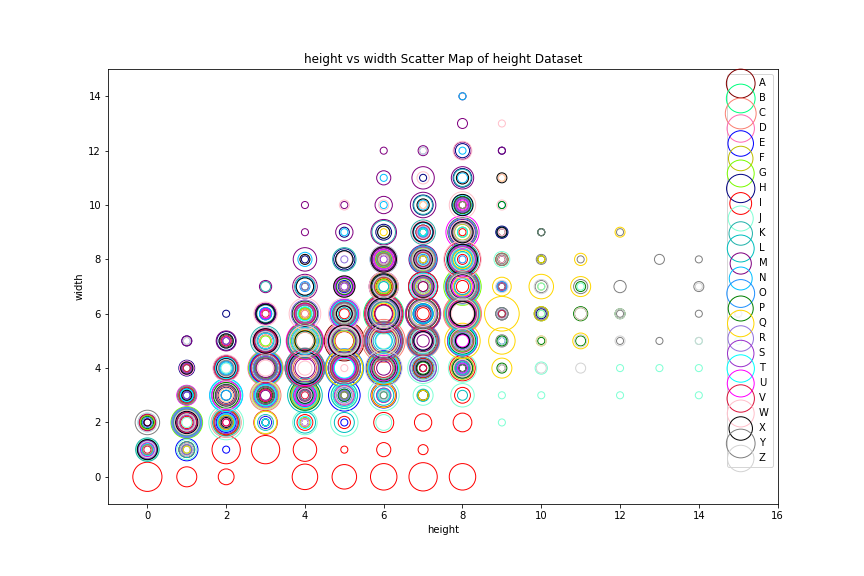

<IPython.core.display.Javascript object>


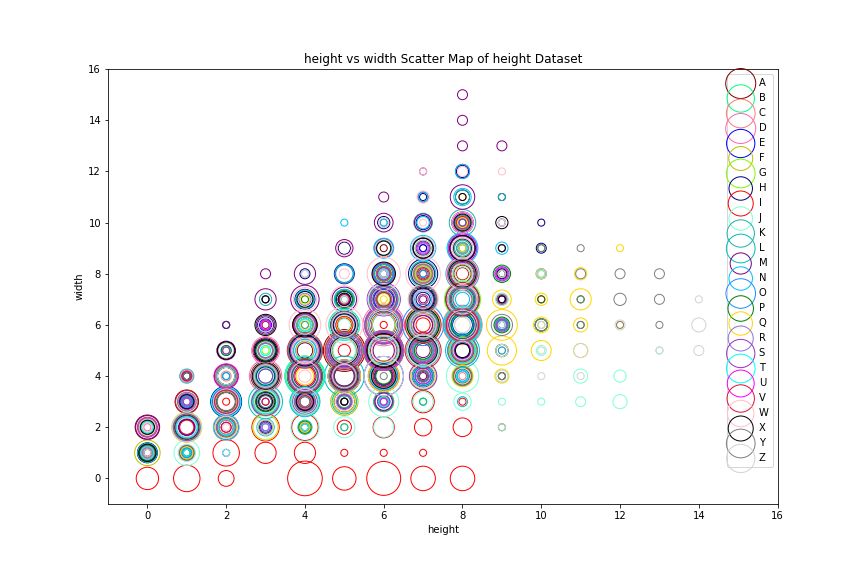

In [93]:
scatter(train, "Train",'height','width',colors)
scatter(test, "Test",'height','width',colors)

In [98]:
def scatter3d(data,x,y, dataName):
    data = generateColorLetter(data)
    fig = plt.figure(figsize = (12, 8))
    ax = plt.axes(projection ="3d")
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.3,
            alpha = 0.2)
    data = data.groupby(['letterID', 'color', x, y]).size().reset_index(name='counts')
    sctt = ax.scatter3D(data.letterID, data[x], data[y],  alpha = 0.5, s=data['counts']*20, c=data['color'])
    plt.title("{0} vs {1} by Letter of {2} dataset".format(x, y,dataName))
    ax.set(xticks=range(0,26), xticklabels=[
        'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]) 
    ax.set_ylabel(x, fontweight ='bold')
    ax.set_xlabel('Letter', fontweight ='bold')
    ax.set_zlabel(y, fontweight ='bold')
    plt.show()

<IPython.core.display.Javascript object>


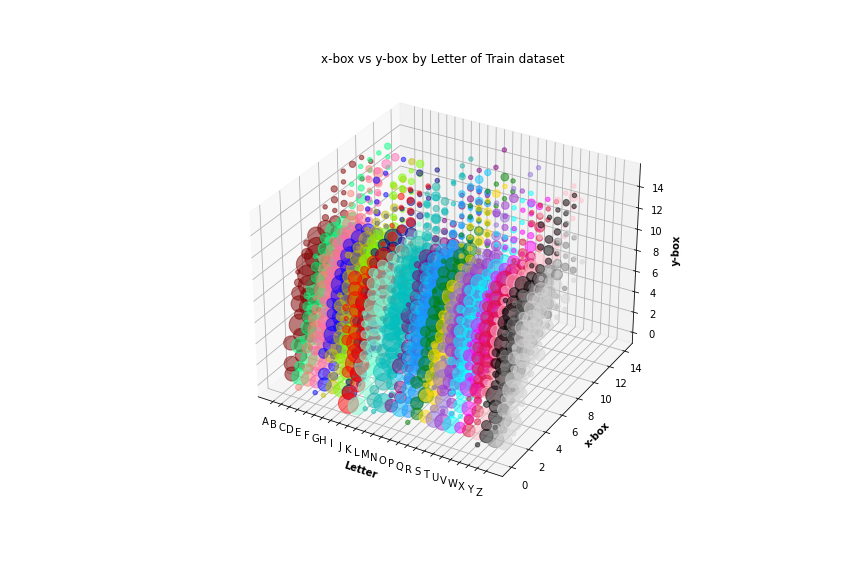

In [99]:
%matplotlib notebook
scatter3d(train,'x-box','y-box',"Train")

In [96]:
def scatterAletter(data, letter, x, y, name):
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(4)
    data = generateColorLetter(data)
    counts = data[data.letter == letter].groupby(['color',x, y]).size().reset_index(name='counts')
    plt.scatter(counts[x], counts[y], s = counts.counts*8, label=letter, c=counts['color'])
    plt.xlim([-1,16])
    plt.ylim([-1,16])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.title("{0} vs {1} Scatter Map of {0} Dataset".format(x,y,name))
    plt.show()

<IPython.core.display.Javascript object>


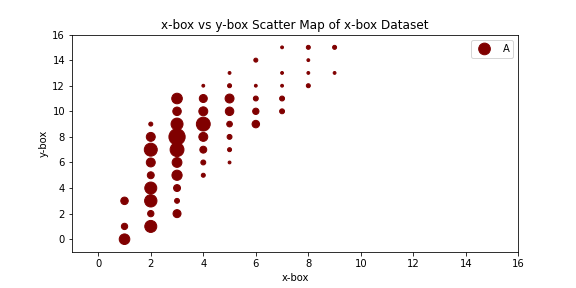

<IPython.core.display.Javascript object>


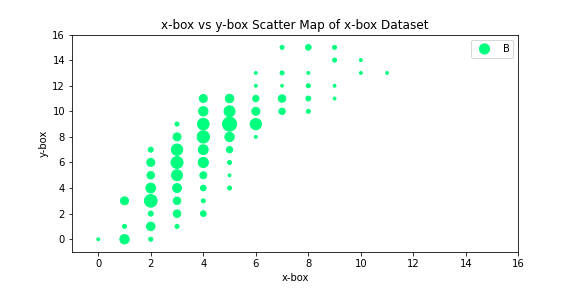

<IPython.core.display.Javascript object>


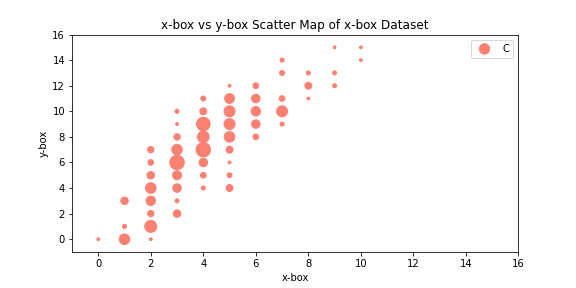

<IPython.core.display.Javascript object>


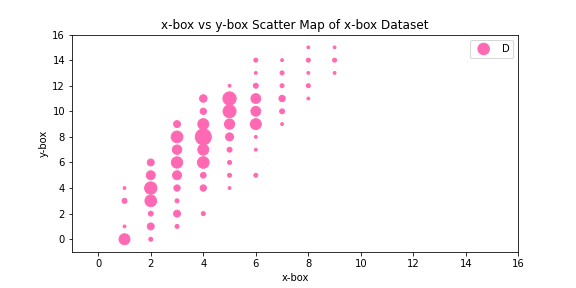

<IPython.core.display.Javascript object>


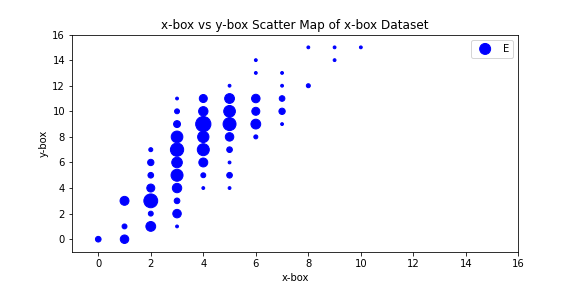

<IPython.core.display.Javascript object>


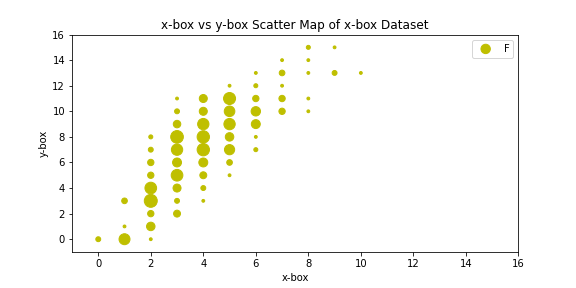

<IPython.core.display.Javascript object>


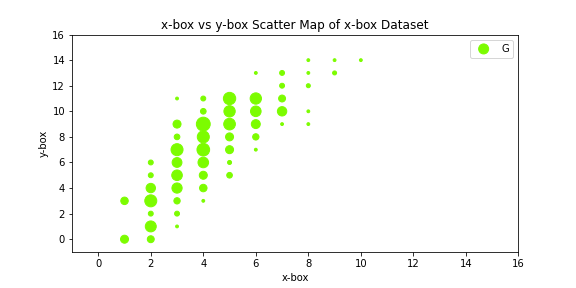

<IPython.core.display.Javascript object>


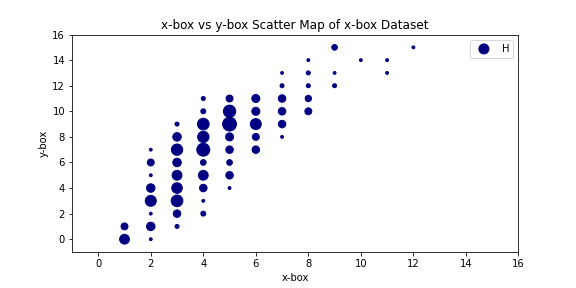

<IPython.core.display.Javascript object>


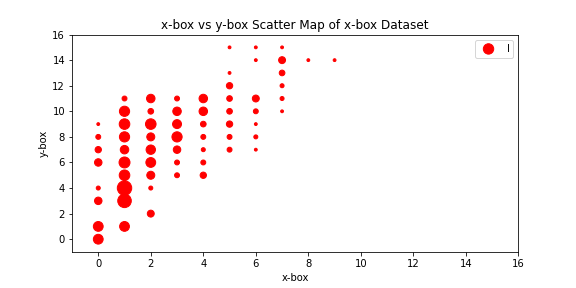

<IPython.core.display.Javascript object>


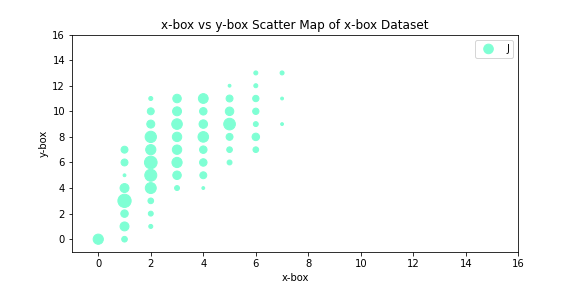

<IPython.core.display.Javascript object>


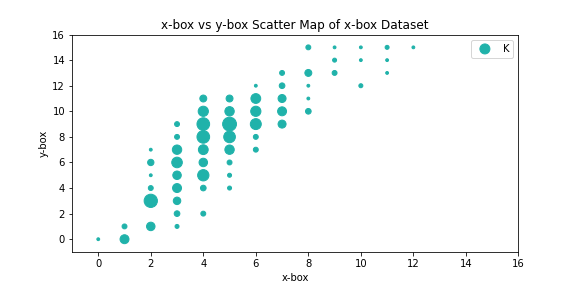

<IPython.core.display.Javascript object>


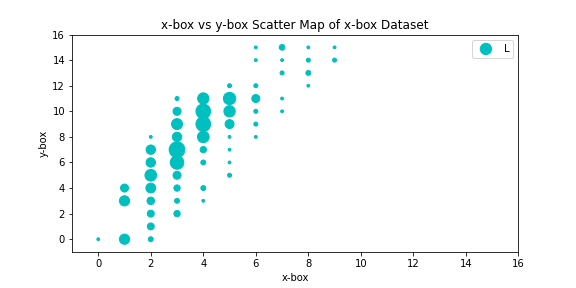

<IPython.core.display.Javascript object>


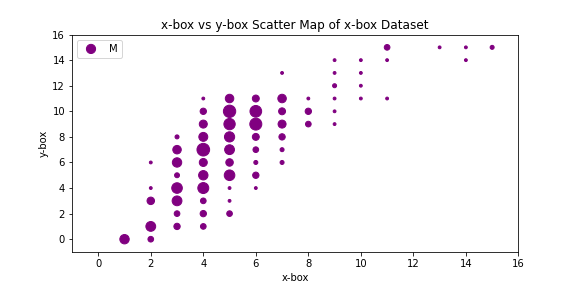

<IPython.core.display.Javascript object>


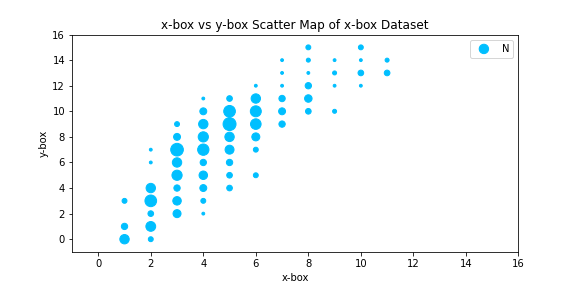

<IPython.core.display.Javascript object>


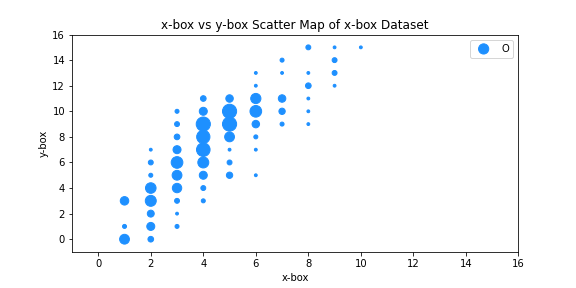

<IPython.core.display.Javascript object>


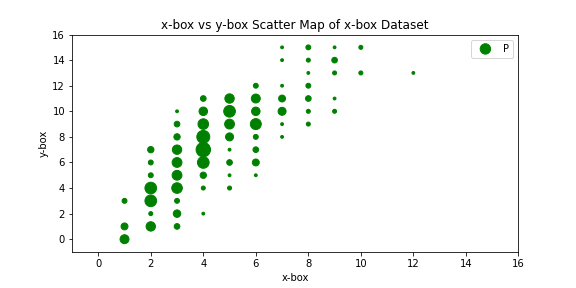

<IPython.core.display.Javascript object>


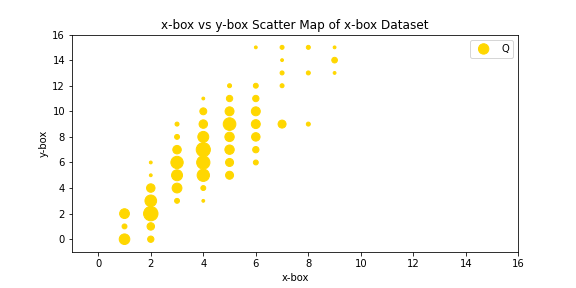

<IPython.core.display.Javascript object>


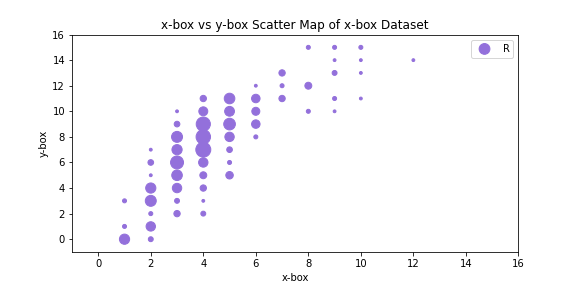

<IPython.core.display.Javascript object>


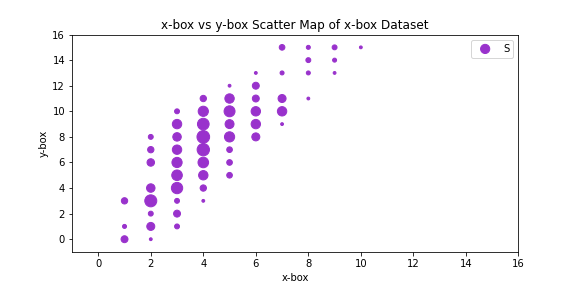

<IPython.core.display.Javascript object>


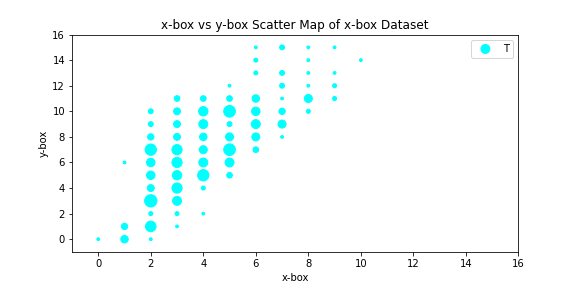

<IPython.core.display.Javascript object>


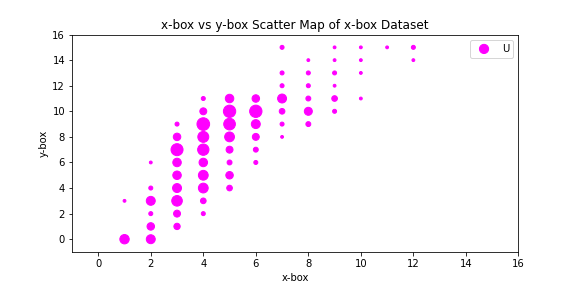

<IPython.core.display.Javascript object>


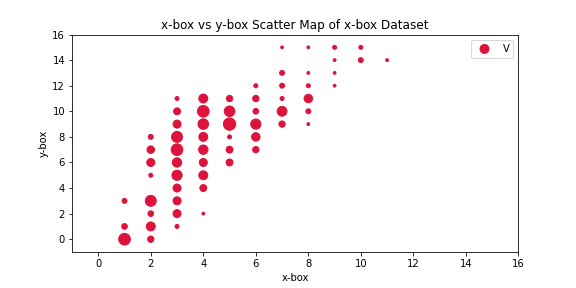

<IPython.core.display.Javascript object>


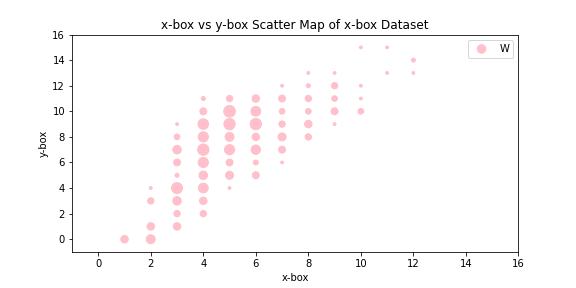

<IPython.core.display.Javascript object>


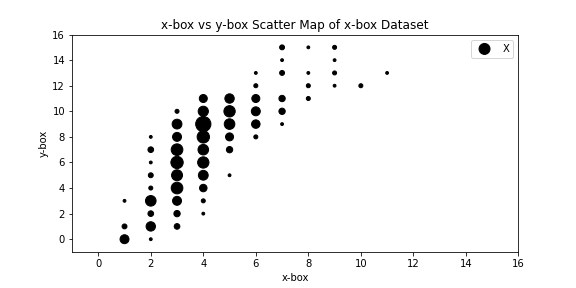

<IPython.core.display.Javascript object>


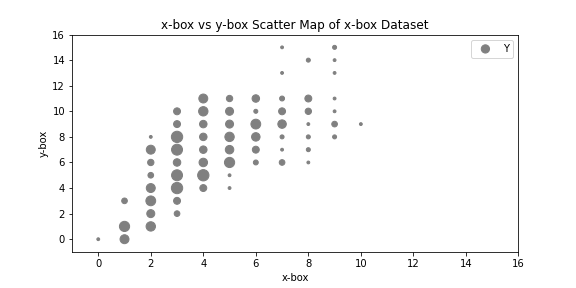

<IPython.core.display.Javascript object>


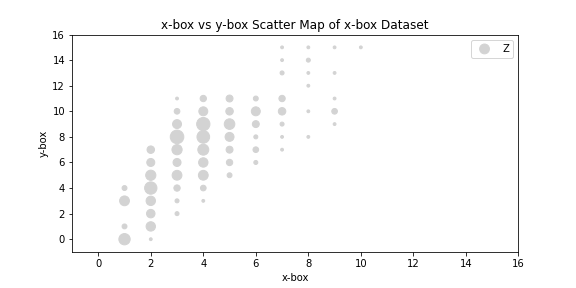

In [97]:
%matplotlib notebook
reader = test.sort_values(by=['letter'], ascending=True)
for letter in reader.letter.unique():
    scatterAletter(test, letter, 'x-box','y-box',"Test")